# Demonstrations toward interpreting decision-tree models

Presented in "Interpreting decision-tree models", a talk by Ralph Haygood at the Research Triangle Analysts meeting on January 17, 2017.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import pandas as pd

<hr style="height: 3px">

In [3]:
from sklearn.datasets.california_housing import fetch_california_housing

In [4]:
housing = fetch_california_housing()

In [5]:
print(housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




<hr style="height: 3px">

In [6]:
from sklearn import tree

In [7]:
dtr = tree.DecisionTreeRegressor(max_depth = 2)

In [8]:
# Features 6 and 7 are latitude and longitude.
dtr.fit(housing.data[:, [6, 7]], housing.target)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [9]:
# You may need to install graphviz. See http://www.graphviz.org/Download..php for instructions. On a Mac with Homebrew,
# "brew install graphviz" should work.
dot_data = \
    tree.export_graphviz(
        dtr,
        out_file = None,
        feature_names = housing.feature_names[6:8],
        filled = True,
        impurity = False,
        rounded = True
    )

In [10]:
# You may need to do "pip install pydotplus".
import pydotplus

In [11]:
graph = pydotplus.graph_from_dot_data(dot_data) 

In [12]:
# Hideous hackery.
graph.get_nodes()[7].set_fillcolor("#FFF2DD")

In [13]:
from IPython.display import Image

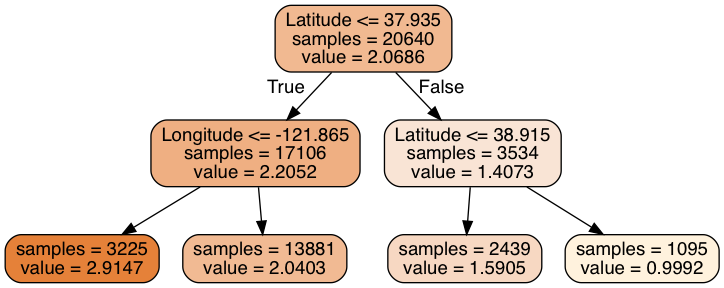

In [14]:
Image(graph.create_png())

In [15]:
graph.write_png("dtr_white_background.png")

True

In [16]:
import matplotlib.patches as patches

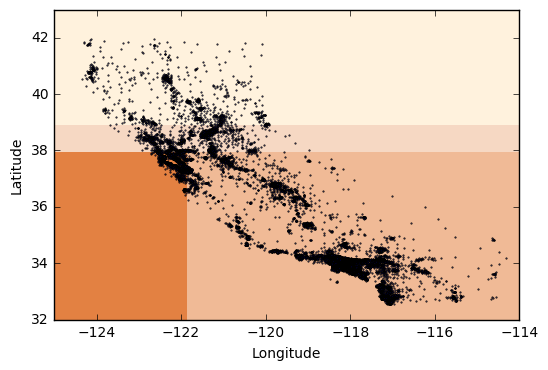

In [17]:
plt.scatter(housing.data[:, [7]], housing.data[:, [6]], s = 1, marker = '.', zorder=1)
plt.gca().set_xlabel("Longitude")
plt.gca().set_xlim(left = -125, right = -114)
plt.gca().set_ylabel("Latitude")
plt.gca().set_ylim(bottom = 32, top = 43)
plt.gca().add_patch(
    patches.Rectangle(
        (-125, 32),
        -121.865-(-125),
        37.935-32,
        edgecolor = "none",
        facecolor = "#E38142",
        zorder=0
    )
)
plt.gca().add_patch(
    patches.Rectangle(
        (-121.865, 32),
        -114-(-121.865),
        37.935-32,
        edgecolor = "none",
        facecolor = "#F0BA96",
        zorder=0
    )
)
plt.gca().add_patch(
    patches.Rectangle(
        (-125, 37.935),
        -114-(-125),
        38.915-37.935,
        edgecolor = "none",
        facecolor = "#F6D8C3",
        zorder=0
    )
)
plt.gca().add_patch(
    patches.Rectangle(
        (-125, 38.915),
        -114-(-125),
        43-38.915,
        edgecolor = "none",
        facecolor = "#FFF2DD",
        zorder=0
    )
)
plt.gcf().savefig("dtr_boxes.png", dpi = 100, transparent = True)

<hr style="height: 3px">

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
data_train, data_test, target_train, target_test = \
    train_test_split(housing.data, housing.target, test_size = 0.1, random_state = 42)

In [20]:
from sklearn import tree

In [21]:
dtr = tree.DecisionTreeRegressor(random_state = 42)

In [22]:
dtr.fit(data_train, target_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [23]:
dtr.score(data_test, target_test)

0.637318351331017

<hr style="height: 3px">

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rfr = RandomForestRegressor(max_features = 'log2', random_state = 42)

In [26]:
rfr.fit(data_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [27]:
rfr.score(data_test, target_test)

0.79622623663286562

<hr style="height: 3px">

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
gbr = GradientBoostingRegressor(random_state = 42)

In [30]:
gbr.fit(data_test, target_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [31]:
gbr.score(data_test, target_test)

0.84732901469177024

<hr style="height: 3px">

In [32]:
pd.Series(gbr.feature_importances_, index = housing.feature_names).sort_values(ascending = False)

Longitude     0.214620
Latitude      0.197368
MedInc        0.172621
AveOccup      0.149446
AveBedrms     0.081797
HouseAge      0.072276
AveRooms      0.061962
Population    0.049909
dtype: float64

<hr style="height: 3px">

In [33]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

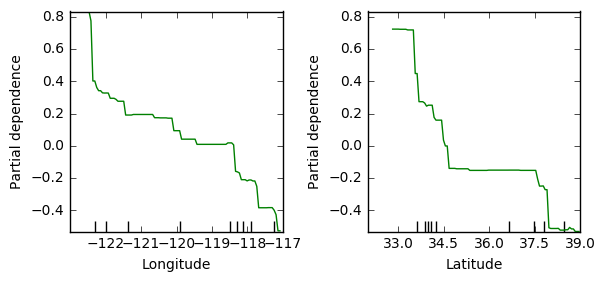

In [34]:
# Features 7 and 6 are longitude and latitude.
plot_partial_dependence(gbr, housing.data, [7, 6], feature_names = housing.feature_names)
plt.gcf().savefig("longitude_and_latitude_pdps.png", dpi = 100, transparent = True)

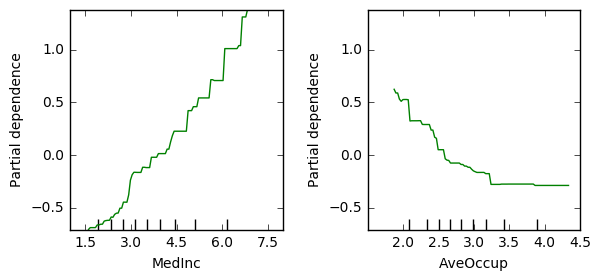

In [35]:
# Features 0 and 5 are median income and average occupancy (people/household).
plot_partial_dependence(gbr, housing.data, [0, 5], feature_names = housing.feature_names)
plt.gcf().savefig("med_inc_and_ave_occup_pdps.png", dpi = 100, transparent = True)

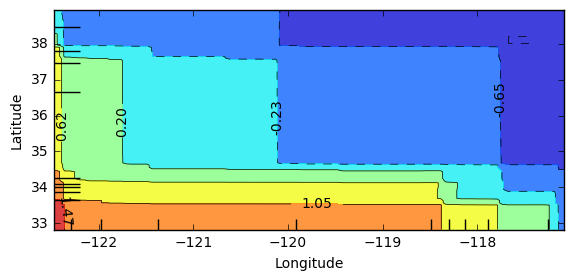

In [36]:
# Features 7 and 6 are longitude and latitude.
plot_partial_dependence(gbr, housing.data, [(7, 6)], feature_names = housing.feature_names)
plt.gcf().savefig("latitude_vs_longitude_pdp.png", dpi = 100, transparent = True)

<hr style="height: 3px">

In [37]:
gbr_2 = GradientBoostingRegressor(max_depth = 2, random_state = 42)

In [38]:
gbr_2.fit(data_test, target_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [39]:
gbr_2.score(data_test, target_test)

0.78301713864372346

In [40]:
gbr_1 = GradientBoostingRegressor(max_depth = 1, random_state = 42)

In [41]:
gbr_1.fit(data_test, target_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [42]:
gbr_1.score(data_test, target_test)

0.64537811440179915

<hr style="height: 3px">

In [43]:
# You may need to do "pip install sklearn-gbmi".
from sklearn_gbmi import *

In [44]:
# Features 7, 6, 0, and 5 are longitude, latitude, median income, and average occupancy (people/household).
h_vals = h_all_pairs(gbr, data_train, [7, 6, 0, 5])

In [45]:
rows = []; cols = ['feature 1', 'feature 2', 'h']
for (f1, f2), h_val in h_vals.iteritems():
    rows.append([housing.feature_names[f1], housing.feature_names[f2], h_val])
pd.DataFrame(rows, columns = cols).set_index(['feature 1', 'feature 2']).h.sort_values(ascending = False)

feature 1  feature 2
Longitude  Latitude     0.596719
MedInc     AveOccup     0.142883
Latitude   AveOccup     0.104409
Longitude  AveOccup     0.061841
Latitude   MedInc       0.061684
Longitude  MedInc       0.033325
Name: h, dtype: float64

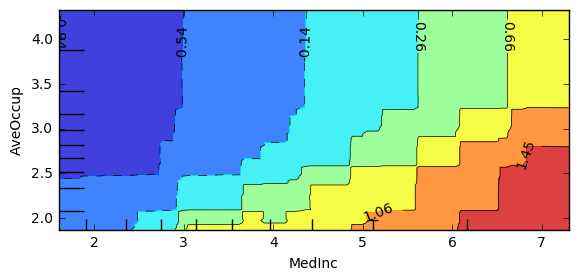

In [46]:
# Features 0 and 5 are median income and average occupancy (people/household).
plot_partial_dependence(gbr, housing.data, [(0, 5)], feature_names = housing.feature_names)
plt.gcf().savefig("ave_occup_vs_med_inc_pdp.png", dpi = 100, transparent = True)